In [1]:
# 밑의 단어 그래프 출력할 때 글자 깨지면 실행 --> 전체 런타임 다시시작해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install konlpy  # 한글 형태소 분석을 위해 설치

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,125 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and dire

0.5275113579000504
저장완료
정확도: 0.528, 정밀도: 0.559, 재현율: 0.596,  F1: 0.577


뉴스 타이틀을 입력해주세요 :해외계좌 총 5억 넘으면 세무신고 
코스피지수는 상승할 것으로 예상됩니다.
정확도 : 70.045
------------------------------------------------
뉴스 타이틀을 입력해주세요 :검찰, '위믹스 유통량 사기' 관련 코인거래소 3곳 압수수색
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 54.737
------------------------------------------------
뉴스 타이틀을 입력해주세요 :美 연준 부의장, 9월 금리인상 중단설 '시기상조'
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 56.221
------------------------------------------------


KeyboardInterrupt: Interrupted by user

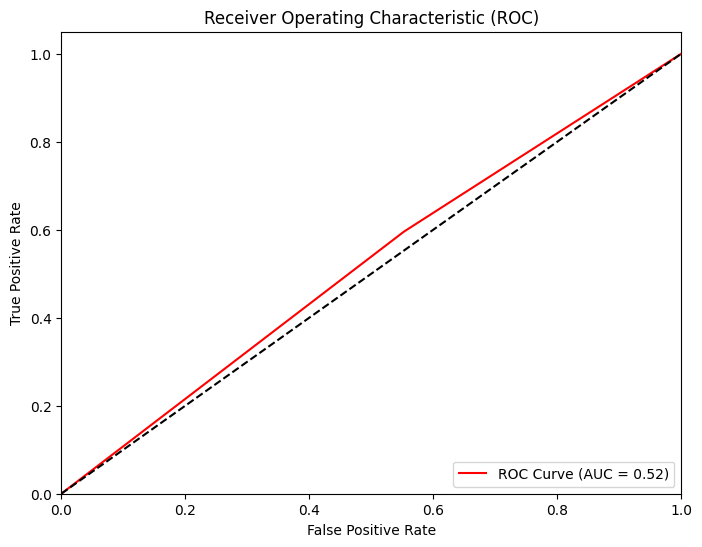

In [2]:
import scipy as sp   # 사이파이(SciPy)는 수치해석기능을 제공하는 파이썬 패키지다.
import pandas as pd  # Pandas는 파이썬에서 사용하는 데이터분석 라이브러리
import numpy as np  # 넘파이는 백터 및 행렬연산에 있어서 엄청난 편의성을 제공

#  한글 형태소 분석기
from konlpy.tag import Okt
o = Okt()

from konlpy.tag import *
import nltk          # 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
import pickle  # list, dict와 같은 파이썬 객체를 그 형태 그대로 저장, 불러올 수 있게끔 하는 패키지​


# 워드 클라우드(word cloud)는 메타 데이터에서 얻어진 태그들을 분석하여 중요도나
# 인기도 등을 고려하여 시각적으로 늘어놓아 표시하는 것이다
from wordcloud import WordCloud, STOPWORDS

# 이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리
from PIL import Image

# 사이킷런(sklearn)의 CountVectorizer는 각 문서에 어떤 단어가 몇 번 등장했는지를 파악할 때 사용
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 통해 자연어를 벡터화하는 경우 발생할 수 있는 문제점
# (의미 없이 자주 사용되는 단어의 가중치의 증가 등)을 해결하기 위한 방법 중 하나가 TfidfVectorizer다.
from sklearn.feature_extraction.text import TfidfVectorizer

# 로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고
# 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.
from sklearn.linear_model import LogisticRegression

# 여러가지 데이터 전처리를 하는 모델들을 한데 묶어서 또는 fit시키려고 쓴다.
from sklearn.pipeline import Pipeline


from sklearn.metrics import accuracy_score  # 정확도 분석

# train set(학습 데이터 셋)과 test set(테스트 셋)을 분리할 수 있다.  ==> 오버피팅 방지
from sklearn.model_selection import train_test_split


# %matplotlib inline 명령어를 사용하면 플로팅 명령의 출력이 Jupyter Notebook과 같은 프론트에서 실행하면 결과를 셀 아래 inline으로 표시
# %matplotlib inline
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 결정트리나 네트워크 등을 시각화해주는 라이브러리 graphviz
import graphviz
# Graphviz가 읽어 들여 그래프 형태로 시각화할 수 있게 한다
from sklearn.tree import export_graphviz

# 그래프에 한글
import matplotlib.font_manager as fm  # 폰트관련 기능 제공 모듈
plt.rc('font', family='NanumBarunGothic')  # 나눔고딕으로 폰트 변경

import matplotlib as mpl       # 그래프 관련 모듈
mpl.rcParams['axes.unicode_minus'] = False  # 그래프의 축 레이블에 유니코드 마이너스 기호 표시

import matplotlib.pyplot as plt # 그래프 그리기 기능 제공
plt.rcParams['font.family'] = 'NanumBarunGothic' # 기본 폰트 패밀리를 나눔바른고딕으로 적용

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc



# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# csv파일을 읽어와서 news_df에 저장
news_df = pd.read_csv('/content/팍스넷_뉴스타이틀.csv')

# 형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()      # 형태소 분석기
    return okt.morphs(text)   # 입력된 텍스트 형태소 분석해서 반환


# 전처리를 위한 함수
def data_preprocessing():
    # 수집한 데이터 읽어오기
    # news_df = pd.read_excel()
    # 학습셋, 테스트셋 분리
    title_list = news_df['뉴스제목'].tolist()    # news_df의 '뉴스제목' 열을 리스트 형태로 가져와 title_list에 저장
    price_list = news_df['주가변동'].tolist()    # news_df의 '주가변동' 열을 리스트 형태로 가져와 price_list 변수에 저장

    # 데이터의 80%는 학습셋, 20%는 테스트셋
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=0)   # title_list와 price_list를 학습셋과 테스트셋으로 분리합니다.
    return title_train, title_test, price_train, price_test   # 분리된 학습셋과 테스트셋을 반환


# 학습을 위한 함수
def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tf-idf, 로지스틱 회귀 이용
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)  # lowercase=False로 설정하여 대문자와 소문자를 구분하고, tokenizer=tokenizer로 지정된 토큰화 함수를 사용
    # 텍스트 데이터를 TF-IDF특성으로 변환

    # 로지스틱 회귀 모델 생성 후 파이프 라인 구성
    # C(규제 강도를 조절하는 변수)의 숫자가 너무 크면 과적합 (기본 1), penalty(규제 유형을 지정하는 변수)로 과적합 방지, random_state는 재현 가능한 난수 시드값
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)

    # 파이프 라인을 구성하여 텍스트 데이터를 TF-IDF특성으로 변환하고 로지스틱 회귀를 수행
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])   # TfidfVectorizer와 LogisticRegression을 연결하여 파이프라인을 생성

    # 학습
    pipe.fit(x_train, y_train)  # 입력 데이터인 x_train(입력 데이터)과 대응하는 레이블인 y_train(타겟 값)으로 모델을 학습

    # 학습 정확도 측정
    y_pred = pipe.predict(x_test) # 학습된 모델을 사용하여 x_test에 대한 예측을 수행후 y_pred에 저장
    print(accuracy_score(y_test, y_pred))  # 예측 결과(y_pred)와 실제 레이블(y_test)을 비교하여 정확도를 출력



    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)  # 학습된 모델 pipe를 fp에 저장
    print('저장완료')     # 학습된 모델 저장 완료

        # 평가지표
    acccuracy = accuracy_score(y_test, y_pred)   # 167/171
    precision = precision_score(y_test, y_pred)  # 107/110
    recall = recall_score(y_test, y_pred)  # 107/108
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)

    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color = "red")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')

    # 저장

    #plt.show()
    plt.savefig("logistic.png")


# 결과 활용 함수
def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat','rb') as fp:     # 읽기
        pipe = pickle.load(fp)

    while True :
        text = input('뉴스 타이틀을 입력해주세요 :')
        str = [text]

        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str)*100)     # 확률값을 구해서 *100(백분율로 표현하기 위해서)
        # 입력된 str에 대한 예측 확률을 반환하는 메서드


        # 예측 결과
        r2 = pipe.predict(str)[0]     # 긍정('1'), 부정('0')
        # 입력된 텍스트에 대해 예측 결과를 반환  --> [0]은 첫번째 값을 반환한다는 의미

        if r2 == 1:
          print('코스피지수는 상승할 것으로 예상됩니다.')
        else:
          print('코스피지수는 하락할 것으로 예상됩니다.')

        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')

# 학습 함수
def model_learning():   # 감성분석 모델 생성
    # data_preprocessing()함수를 호출하여 데이터 전처리 과정 수행
    # 이 과정에서는 데이터를 읽어오고, 학습셋과 테스트셋으로 분리하는 작업이 이루어짐
    # 분리된 학습셋과 데이터셋은 아래 변수들에 저장됨
    title_train, title_test, price_train, price_test = data_preprocessing()

    # 실제 모델 학습을 수행
    # title_train, price_train, title_test, price_test를 전달받음
    # pipe라인설정한데로 학습하고 pipe에 저장된다.
    learning(title_train, price_train, title_test, price_test)

# 사용 함수
def model_using():   # 감성분석 모델 사용
    using()

model_learning()

model_using()